In [1]:
import glob
from scipy.ndimage import imread
from scipy.misc import imresize
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
im = Image.open('00000133.jpg')
# 查看图片的格式 大小 和 模式(L,RGB, CMKY)
im.format,im.size,im.mode

('JPEG', (256, 256), 'RGB')

Image 是PIL中函数，使用Image.open()得到一个图像object.
可以直接用来查看图像

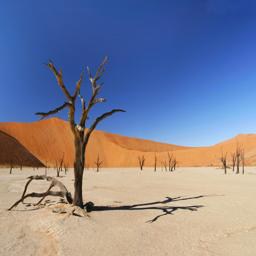

In [3]:
im

调整图片大小，同时将其转换为 **ndarray** 数据

In [5]:
img = im.resize((128, 128),Image.ANTIALIAS)
img = np.array(img)

img 的数据类型是无符号8位整型数据，即 0-255

In [7]:
img.dtype

dtype('uint8')

**归一化和反归一化**

1. **归一化**：无论时候归一化到[0.0,1.0],还是[-1.0,1.0].都需要将 uint8转化为float类型

(1) 一种方法是  img.astype(float)

(2) 一种是在计算的时候，使用自动转换----使用float值

2. **反归一化**：需要将数据转换为 unint8

方法是：img.astype(np.uint8)

In [9]:
def normalize(img, cdim=3):
#     [0-255]/255 * 2-1 ---->[-1,1]
    return img/255.0*2-1

def unnormalize(img, cdim=3):
    # [-1,1]+1-->[0,2]/2--->[0,1]*255---->[0,255]
    img = 255. * ((img+ 1.) / 2.0)
    img_out = img.astype(np.uint8)
    return img_out

(array([ 349., 4296., 5613., 6998., 3226., 4857., 9476., 7208., 6158.,
         971.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

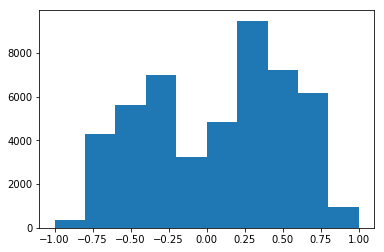

In [14]:
# 查看结果
plt.hist(normalize(img).flatten())

(array([ 401., 4244., 5613., 6998., 3226., 4442., 9891., 7208., 6158.,
         971.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

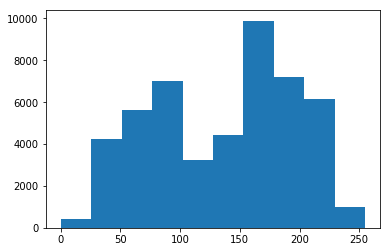

In [18]:
# 查看结果
plt.hist(unnormalize(normalize(img)).flatten())

**展示结果**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5,1,'unnormalization')

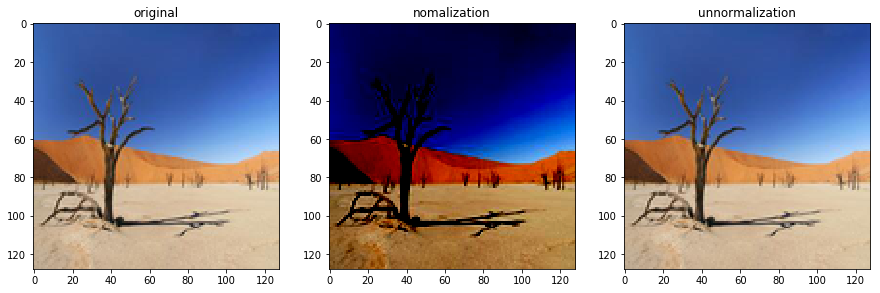

In [26]:
fig, axarr = plt.subplots(1,3,figsize=(15,15))
axarr[0].imshow(img)
axarr[0].set_title('original')
axarr[1].imshow(normalize(img))
axarr[1].set_title('nomalization')
axarr[2].imshow(unnormalize(normalize(img)))
axarr[2].set_title('unnormalization')